**Qiskit Textbook - Chapter 2 Quick Exercises**

In [11]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

1.1 Quick Exercises:
<img src="exercise 1.jpg" width="800" height="400">

2.1 Quick Exercises:
<img src="exercise 211.jpg" width="800" height="400">

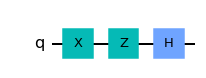

In [12]:
qc = QuantumCircuit(1)
qc.x(0)
qc.z(0)
qc.h(0)
qc.draw(output='mpl')

In [13]:
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()
print(np.around(unitary))

[[-0.71+8.66e-17j  0.71+0.00e+00j]
 [ 0.71-8.66e-17j  0.71+0.00e+00j]]


3.3 Exercise - Creating Bell States

<img src="exercise 311.jpg" width="800" height="400">

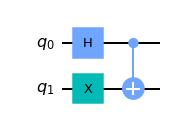

In [20]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.draw(output='mpl')

In [21]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
final_state

array([0.  +0.j, 0.71+0.j, 0.71+0.j, 0.  +0.j])

In [26]:
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()
print(np.around(unitary))

[[ 0.+0.j  0.+0.j  1.+0.j  1.-0.j]
 [ 1.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 1.+0.j  1.-0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j -1.+0.j]]


In [29]:
from qiskit.quantum_info.operators import Operator
qc = QuantumCircuit(2)
qc.unitary(Operator(unitary),[0,1], label='bell')

backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
print(np.around(final_state))

[0.+0.j 1.+0.j 1.+0.j 0.+0.j]


Exercise 2.3.1 - controlled T gate

<img src="exercise 411.jpg" width="800" height="400">

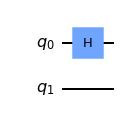

In [46]:
qc = QuantumCircuit(2)
qc.h(0)
qc.draw(output='mpl')

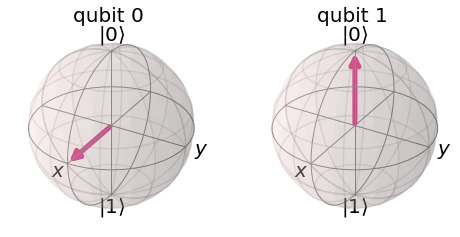

In [47]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

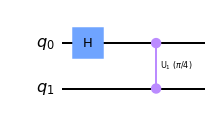

In [48]:
qc.cu1(pi/4, 0, 1)
qc.draw(output='mpl')

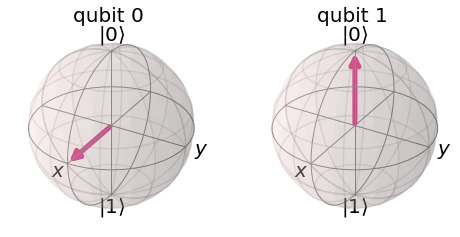

In [49]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

Exercise 2.3.2 - SDG

<img src="exercise 232.jpg" width="800" height="400">

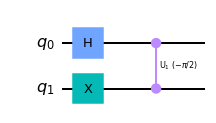

In [52]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cu1(-pi/2, 0, 1)
qc.draw(output='mpl')

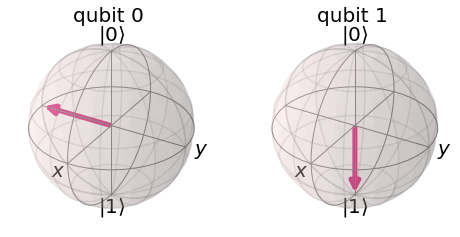

In [53]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

Exercise 2.3.3 - CTRL-T

<img src="exercise 233.jpg" width="800" height="400">

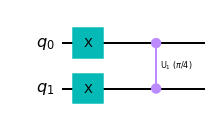

In [54]:
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
qc.cu1(pi/4, 0, 1)
qc.draw(output='mpl')

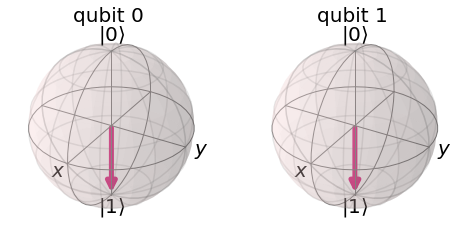

In [55]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

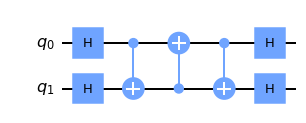

In [96]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
qc.h(0)
qc.h(1)
qc.draw(output='mpl')

In [97]:
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()
print(np.around(unitary))

[[ 1.-0.j -0.+0.j -0.+0.j -0.-0.j]
 [-0.+0.j -0.-0.j  1.-0.j -0.+0.j]
 [-0.+0.j  1.-0.j -0.-0.j -0.+0.j]
 [-0.-0.j -0.+0.j -0.+0.j  1.-0.j]]


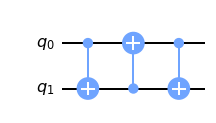

In [98]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
qc.draw(output='mpl')

In [99]:
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()
print(np.around(unitary))

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


**Exercise 2.6**

Solution seems trivial, but perhaps I've missed something. Output bit is controlled by input, so if input is |0> then output unchanged and if input is |1> then output state flipped. Output similarly controls the final output. So if output is initialized to |0>, then final output bit will be set to the state of the input bit. If output is initialized to |1> then the final output bit will be X|input>. Only the final output bit is written to. The output and garbage bits both have two cx gates acting on them, so no change.

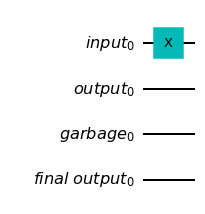

In [123]:
# Example with output bit initially to 0

input_bit = QuantumRegister(1, 'input')
output_bit = QuantumRegister(1, 'output')
garbage_bit = QuantumRegister(1, 'garbage')
final_bit = QuantumRegister(1, 'final output')

Vf = QuantumCircuit(input_bit, output_bit, garbage_bit, final_bit)
Vf.x(input_bit)
Vf.draw(output='mpl',justify='none')

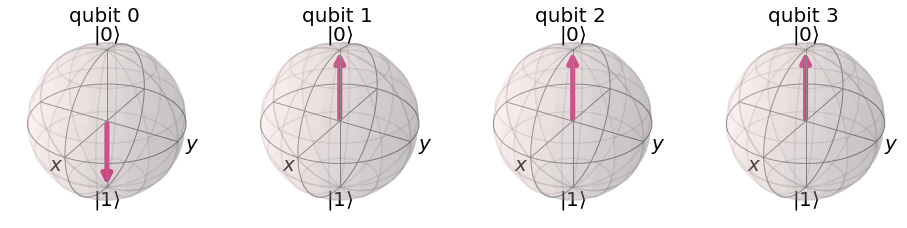

In [124]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(Vf,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

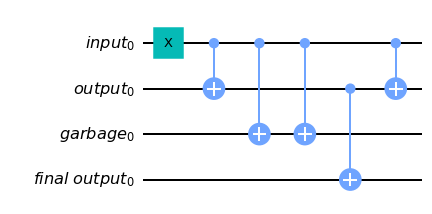

In [125]:
Vf.cx(input_bit[0], output_bit[0])
Vf.cx(input_bit[0], garbage_bit[0])
Vf.cx(input_bit[0], garbage_bit[0])
Vf.cx(output_bit[0], final_bit[0])
Vf.cx(input_bit[0], output_bit[0])
Vf.draw(output='mpl',justify='none')

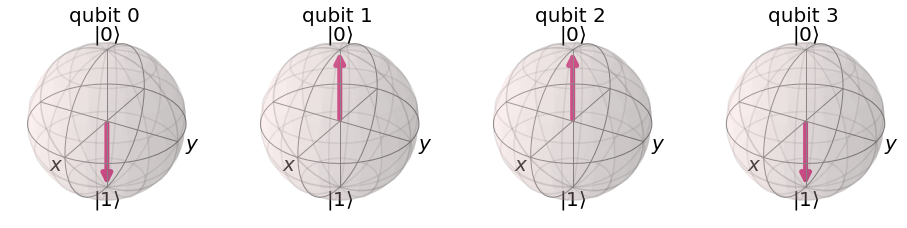

In [126]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(Vf,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

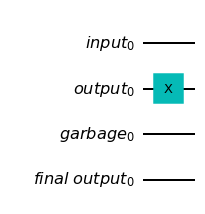

In [127]:
# Example with output bit initially to 1

input_bit = QuantumRegister(1, 'input')
output_bit = QuantumRegister(1, 'output')
garbage_bit = QuantumRegister(1, 'garbage')
final_bit = QuantumRegister(1, 'final output')

Vf = QuantumCircuit(input_bit, output_bit, garbage_bit, final_bit)
Vf.x(output_bit)
Vf.draw(output='mpl',justify='none')

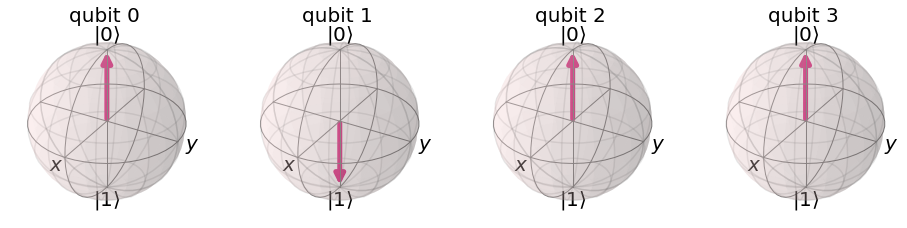

In [128]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(Vf,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

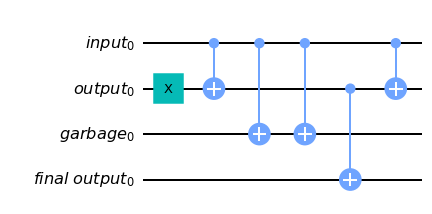

In [129]:
Vf.cx(input_bit[0], output_bit[0])
Vf.cx(input_bit[0], garbage_bit[0])
Vf.cx(input_bit[0], garbage_bit[0])
Vf.cx(output_bit[0], final_bit[0])
Vf.cx(input_bit[0], output_bit[0])
Vf.draw(output='mpl',justify='none')

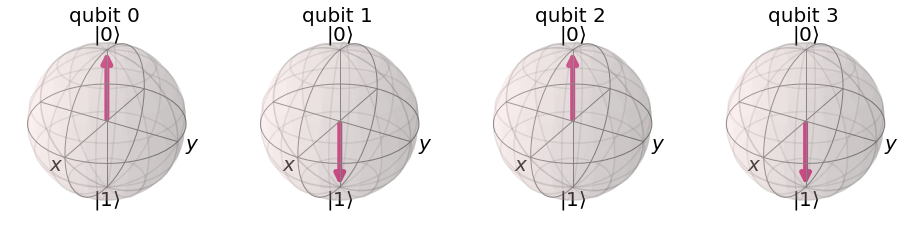

In [130]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(Vf,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)